# Data 622
## Assignment 2
Mark Ly

Student ID: 00504696


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
# sklearn datasets
import pandas as pd
from sklearn import datasets
# sklearn preprocessing
from sklearn import preprocessing

# sklearn model selection and metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import metrics

# classifier
from sklearn.svm import SVC

# Data preprocessing
Loading the diabetes data from sklearn and one hot encoding the sex variable.

In [2]:
# Loading data
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
diabetesDf = pd.DataFrame(X, columns = diabetes.feature_names)
diabetesDf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
# exploring diabetes data
diabetesDf.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [6]:
print(diabetesDf['sex'].tolist()[0:10])

# one hot encoding
enc = preprocessing.OneHotEncoder(categories="auto")
sex = enc.fit_transform(X[:,1].reshape(-1,1)).toarray()
print(sex[:10,])

[0.0506801187398187, -0.044641636506989, 0.0506801187398187, -0.044641636506989, -0.044641636506989, -0.044641636506989, 0.0506801187398187, 0.0506801187398187, 0.0506801187398187, -0.044641636506989]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [7]:
# appending new encoded data to dataset
X = np.delete(X,1,1)
X = np.concatenate((sex,X),axis=1)
X_df = pd.DataFrame(X)
X_df.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,1.0,0.0,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.0,1.0,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,1.0,0.0,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,1.0,0.0,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


<AxesSubplot:>

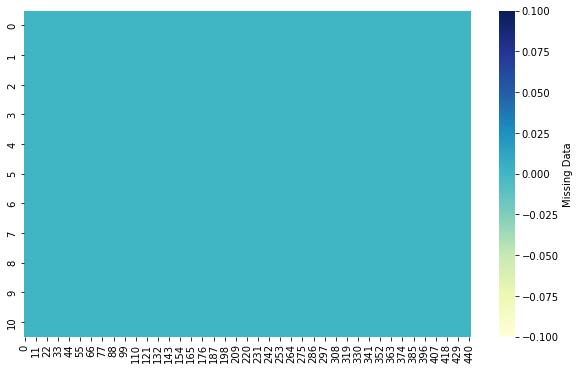

In [8]:
# Don't need both male and female columns,
X = np.delete(X,1,1)
X

# visually checking for missing values
plt.figure(figsize=(10,6))
sns.heatmap(X_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

# Data Partitioning
80/20 split between training and testing data

In [9]:
# 80,20 split and random shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(353, 10)
(353,)
(89, 10)
(89,)


# Hyperparameter Tuning
Trying the different kernels as well as different degrees for the polynomial kernel based on the mean squared error
on a 5-fold cross validation.

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# finding the best kernel to use
param_grid = [{'kernel': ['linear', 'rbf', 'sigmoid','poly']}]
svr = SVR()
gs = GridSearchCV(svr,param_grid,cv=5, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.cv_results_)
print(gs.best_params_)

# finding the best degree for the poly kernel
parameter = [{"kernel":['poly'],"degree":[1,2,3,4,5]}]
gs2 = GridSearchCV(svr,parameter,cv=5, scoring='neg_mean_squared_error')
gs2.fit(X_train, y_train)
print(gs2.cv_results_)
print(gs2.best_params_)

{'mean_fit_time': array([0.00659852, 0.00718598, 0.0083992 , 0.00580654]), 'std_fit_time': array([0.00272532, 0.00097675, 0.0004918 , 0.00075822]), 'mean_score_time': array([0.00180812, 0.00421391, 0.00219293, 0.00169668]), 'std_score_time': array([0.0004059 , 0.00038853, 0.00039485, 0.00039622]), 'param_kernel': masked_array(data=['linear', 'rbf', 'sigmoid', 'poly'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'kernel': 'linear'}, {'kernel': 'rbf'}, {'kernel': 'sigmoid'}, {'kernel': 'poly'}], 'split0_test_score': array([-6381.66815982, -6293.29811928, -6337.87971427, -6142.98981413]), 'split1_test_score': array([-4763.38522877, -4679.17947644, -4751.70367366, -4487.43351254]), 'split2_test_score': array([-5068.39498468, -4959.12441144, -5022.19782767, -4714.57253617]), 'split3_test_score': array([-6305.48377419, -6189.49093217, -6254.51626598, -5905.71901998]), 'split4_test_score': array([-7323.78882106, -7213.91102994,

# Final Model
We found that the best hyperparameters are with kernel = poly with a degree of 5.

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly',degree=5)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

print('''
SVR Kernel: poly
poly degree: 5
''')
print("MSE: {}\nMAE: {}".format(metrics.mean_squared_error(y_test, y_pred), metrics.mean_absolute_error(y_test, y_pred)))

[169.8598771  138.90032851 138.90032524 146.29756181 138.90033022
 138.90032629 115.02838798 138.90032846 138.90032968 188.48822639
  91.92838742 138.90032634 153.98244919 131.06240479 138.90035659
 138.90032628 138.90032627  87.84485623 103.07798038 145.51422348
 112.84645301 128.90128944 138.90032639 138.90046396 138.90032629
 108.68228758 138.90033723 178.72199571  89.17400245 138.90032647
 138.90031837 119.14495469 119.55746192 138.90032528 138.90032581
 138.90032639 203.92034669 138.90032626 138.9003282  138.90032174
 105.37116791 140.87123085 165.70011837 214.81919946 152.51759626
 138.90032649 138.90033714 150.56951531 201.05076931 138.90032923
 221.89528374 138.90032419 138.90033395 138.90035145 138.90032603
 118.35223781  94.8494827  116.72125036 174.04974842 138.90032829
 138.90032378 138.90032632 138.90032635 153.354843   158.57927005
 138.90042101 198.55256679 138.9003378  138.90032628 138.90032658
 138.90032671 138.9003263  186.01119204 148.13593406 138.90032642
 142.59578

Using the support vector regression on the diabetes dataset, we get a mean squared error of MSE: 5331.5723 and a mean
 absolute error of MAE: 60.2515. Using the Poly kernel with a degree of 5.

In [22]:
diabetesDf



KeyError: 1